In [1]:
import pandas as pd
import seaborn as sns
sns.set_context("talk")

In [2]:
df = pd.read_csv("data/other/Competition in Local Elections Moving To Districts - Sheet1.csv",
                 usecols=range(5))

In [3]:
df.loc[:, "Candidates/Seats"] = df["Candidates"]/df["Seats"]
df = df[df["Year"] >= 2000]

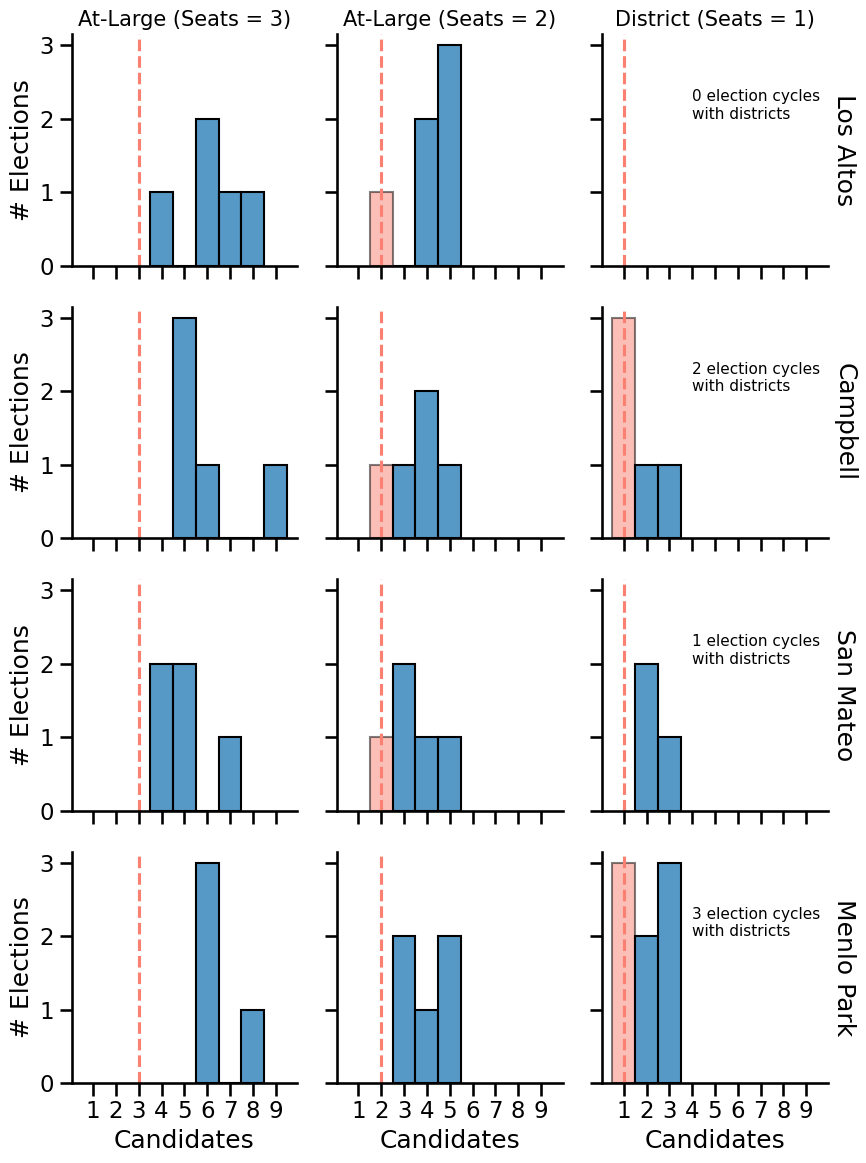

In [4]:
g = sns.FacetGrid(df, row="City", col="Seats", col_order=[3,2,1], margin_titles=True)
g.map(sns.histplot, "Candidates", discrete=True);
g.set_axis_labels(y_var="# Elections")
g.set(xticks=range(1,10), yticks=range(4))
g.set_titles(row_template="{row_name}")

g.axes[0,0].set_title("At-Large (Seats = 3)", size=15)
g.axes[0,1].set_title("At-Large (Seats = 2)", size=15)
g.axes[0,2].set_title("District (Seats = 1)", size=15)

for col in range(g.axes.shape[1]):
    for val, ax in enumerate(g.axes[:, col]):
        ax.axvline(3-col, color="salmon", linestyle="--")

for row, col in [(0, 1), (1, 1), (1, 2), (2, 1), (3,2)]:
    patch = g.axes[row, col].patches[0]
    patch.set_facecolor('salmon')
    patch.set_alpha(0.5)

for row, cycles in enumerate([0, 2, 1, 3]):
    g.axes[row, 2].text(4, 2, f"{cycles} election cycles\nwith districts", size=11)
